In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import snap
import networkx

In [3]:
labels=pd.read_csv('../input/training_variants',index_col=0)['Class'].to_dict()

In [4]:
df =pd.read_csv('edges_30.txt',header=None)

In [5]:
df.columns=['rawsrc','rawdest','w']
df.shape

(78991, 3)

In [6]:
df.head()

rawsrc rawdest     w
0  te2641  te5564  3434
1  te3258  tr1307  3419
2  te4206   tr699     1
3  tr2553  tr2592  3001
4  te4529  tr1126  3501

In [7]:
df['src']=df['rawsrc'].apply(lambda u:  int(u[2:])  if u[:2]=='te' else 10000+int(u[2:]))
df['dest']=df['rawdest'].apply(lambda u:  int(u[2:])  if u[:2]=='te' else 10000+int(u[2:]))

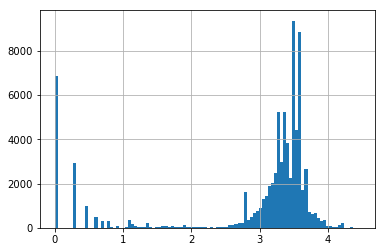

In [8]:
np.log10(df['w']).hist(bins=100);

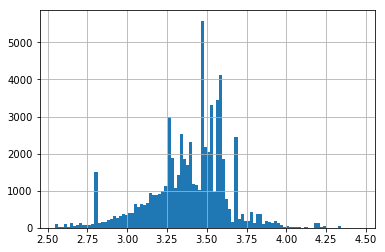

In [9]:
np.log10(df[df['w']>350]['w']).hist(bins=100);

In [10]:
np.log10 (28684) 

4.4576397138296802

In [11]:
10**4 

10000

In [12]:
10**2.5

316.22776601683796

In [13]:
subdf=df[(df['w']>300*1) & (df['w']<10000)][['src','dest','w']]
subdf.shape

(64528, 3)

In [14]:
nodes=set(pd.concat([subdf['src'],subdf['dest']]))
len(nodes),len([u for u in nodes if u <1000000]),len([u for u in nodes if u >10000])

(5872, 5872, 2814)

In [47]:
g=snap.PUNGraph.New()

In [48]:
use_test=True
for n in nodes:
    if use_test or n>10000:
        g.AddNode(n)

In [49]:
for row in subdf.values:
    u,v,w=row[:3]
    if use_test or u>10000 and v >10000:
        g.AddEdge(u,v)

In [30]:
np.log(0.2),np.log(0.417323),np.log(0.617323)

(-1.6094379124341003, -0.87389477668013282, -0.48236289124512222)

In [31]:
pd.DataFrame(lst)[1].sum()

2814

In [32]:
np.log(0.090909)*0.090909*9

-1.9619131703748525

In [34]:
Components = snap.TCnComV()
#snap.GetWccs(g, Components)
snap.CommunityCNM(g,Components)
#snap.CommunityGirvanNewman(g,Components)

lst=[]
lst2=[]
for CnCom in Components:
    trainlabels=[nid for nid in CnCom if nid>=10000]
    testlabels=[nid for nid in CnCom if nid<10000]
    
    n1=len([_ for nid in CnCom if nid>=10000])
    cl=[labels[i-10000] for i in  CnCom if i>=10000]
    vc=pd.Series(cl).value_counts()
    vcc=vc.loc[range(1,10)].fillna(0)+1
    p= (vcc/vcc.sum()).tolist()
    lst2+=[[u]+p for u in CnCom]
    if vc.sum()>0: lst.append([CnCom.Len(), n1 ]+ p)
#pd.DataFrame(lst).sort_values(2)

In [59]:
gg=lambda x: -x*np.log(x)-(1-x)*np.log(1./8-x/8)
#x=np.arange(0.5,0.99,0.01)
#plt.plot(x,-x*np.log(x)-(1-x)*np.log(1./8-x/8))

In [36]:
def f(u):
    a=u[2:11]
    b=u[1]
    c=[v*np.log(v) for v in a]
    return np.sum(c)*b
pd.DataFrame(lst).apply(lambda u:f(u),axis=1).sum()/float(len([u for u in nodes if u >10000]))

-1.5881433720329161

In [85]:
a=pd.DataFrame(lst)
a['maxp']=np.max(a.values[:,2:11],1)
a['loss']=-a.apply(f,1)/a.loc[:,1]
a['aa']=np.round(a['maxp'].map(gg)-a['loss'],5)
a.sort_values('loss').head(50)


0    1         2         3         4         5         6         7  \
44  123  100  0.009174  0.009174  0.055046  0.880734  0.009174  0.009174   
61   40   31  0.025000  0.025000  0.025000  0.025000  0.025000  0.725000   
20  159  122  0.099237  0.007634  0.007634  0.061069  0.152672  0.648855   
6   166   85  0.223404  0.053191  0.010638  0.627660  0.010638  0.021277   
67   27   14  0.043478  0.043478  0.043478  0.043478  0.043478  0.043478   
2   941  372  0.076115  0.209974  0.031496  0.034121  0.039370  0.041995   
4   326  141  0.073333  0.293333  0.006667  0.100000  0.033333  0.020000   
0   253  102  0.063063  0.261261  0.018018  0.036036  0.045045  0.054054   
14  360  228  0.244726  0.004219  0.067511  0.202532  0.367089  0.101266   
50   13   11  0.550000  0.050000  0.050000  0.050000  0.100000  0.050000   
10  180   77  0.197674  0.151163  0.011628  0.034884  0.081395  0.058140   
54   13    9  0.055556  0.055556  0.055556  0.555556  0.055556  0.055556   
3   610  277  0.325175  0.132867  0.017483  0.241259  0.024476  0.031469   
12  152   67  0.289474  0.171053  0.013158  0.065789  0.052632  0.052632   
7   232   83  0.141304  0.152174  0.021739  0.217391  0.021739  0.010870   
22   16    9  0.055556  0.055556  0.055556  0.111111  0.055556  0.055556   
1   208  116  0.168000  0.072000  0.104000  0.352000  0.064000  0.016000   
11   50   27  0.111111  0.055556  0.027778  0.027778  0.027778  0.416667   
15  132   50  0.101695  0.271186  0.033898  0.118644  0.033898  0.016949   
34   70   42  0.196078  0.058824  0.019608  0.196078  0.019608  0.019608   
58   25   18  0.111111  0.074074  0.037037  0.037037  0.370370  0.037037   
13  147   64  0.164384  0.136986  0.054795  0.136986  0.068493  0.027397   
37   22   13  0.090909  0.045455  0.272727  0.363636  0.045455  0.045455   
56   18   12  0.047619  0.095238  0.047619  0.238095  0.047619  0.047619   
18  218   99  0.194444  0.083333  0.046296  0.333333  0.157407  0.111111   
16  286  114  0.138211  0.097561  0.073171  0.325203  0.048780  0.024390   
8   316  147  0.211538  0.096154  0.070513  0.179487  0.064103  0.051282   
5    16   13  0.227273  0.045455  0.045455  0.045455  0.181818  0.318182   
40    9    5  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429   
49   10    5  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429   
23   25   12  0.047619  0.190476  0.047619  0.238095  0.047619  0.047619   
27  215  107  0.129310  0.232759  0.043103  0.094828  0.137931  0.094828   
35  125   63  0.041667  0.180556  0.013889  0.069444  0.041667  0.208333   
88    6    6  0.066667  0.066667  0.066667  0.400000  0.133333  0.066667   
31   25    7  0.312500  0.062500  0.062500  0.250000  0.062500  0.062500   
36    9    4  0.076923  0.076923  0.076923  0.076923  0.076923  0.076923   
29   12    4  0.384615  0.076923  0.076923  0.076923  0.076923  0.076923   
62    9    6  0.066667  0.066667  0.066667  0.333333  0.066667  0.066667   
39   21    5  0.071429  0.071429  0.071429  0.071429  0.142857  0.071429   
60    9    7  0.312500  0.062500  0.062500  0.125000  0.187500  0.062500   
76    9    5  0.214286  0.071429  0.071429  0.071429  0.285714  0.071429   
77    7    5  0.071429  0.071429  0.071429  0.071429  0.214286  0.071429   
51   13    7  0.125000  0.125000  0.062500  0.312500  0.062500  0.125000   
26    8    3  0.083333  0.083333  0.083333  0.333333  0.083333  0.083333   
73    5    3  0.083333  0.083333  0.083333  0.083333  0.083333  0.083333   
57    6    3  0.083333  0.083333  0.083333  0.333333  0.083333  0.083333   
53    6    3  0.083333  0.083333  0.083333  0.083333  0.083333  0.083333   
9     6    3  0.083333  0.083333  0.083333  0.083333  0.083333  0.083333   
87    3    3  0.083333  0.333333  0.083333  0.083333  0.083333  0.083333   
55   16    6  0.133333  0.200000  0.066667  0.266667  0.066667  0.066667   

           8         9        10      maxp      loss       aa  
44  0.009174  0.009174  0.009174  0.880734  0.572743  0.04072  
6

In [93]:
df=pd.DataFrame(lst2,columns=['ID']+["w30_"+str(i) for i in range(1,10)])
df.index=df['ID']
df=df.drop("ID",1)

In [98]:
newtrain=df[df.index>=10000].sort_index()
newtrain.index=newtrain.index-10000
newtest=df[df.index<10000].sort_index()

In [101]:
newtrain.to_csv("../input/newtrain_w30p.csv")
newtest.to_csv("../input/newtest_w30p.csv")

In [96]:
snap.CntUniqUndirEdges(g)

65007

In [21]:
snap.CntDegNodes(g,22)

33

In [86]:
def cmty_kcore(K):
    kcore=snap.GetKCore(g,K)
    CmtyV = snap.TCnComV()
    modularity = snap.CommunityCNM(kcore, CmtyV)
    lst=[]
    for CnCom in CmtyV:
        n1=len([_ for nid in CnCom if nid>=10000])
        cl=[labels[i-10000] for i in  CnCom if i>=10000]
        vc=pd.Series(cl).value_counts()
        vcc=vc.loc[range(1,10)].fillna(0)+1
        p= (vcc/vcc.sum()).tolist()
        if vc.sum()>0: lst.append([CnCom.Len(), n1 ]+ p)
    df=pd.DataFrame(lst) 
    print df.shape,modularity  
    #print df
    df['maxp']=np.max(df.values[:,2:11],1)
    df['loss']=-df.apply(f,1)/df.loc[:,1]
    df['aa']=np.round(df['maxp'].map(gg)-df['loss'],5)    
    print df.shape,modularity,df.sum()[1]
    #plt.scatter(df.loc[:,1],df.loc[:,2]);plt.show()
    return df.sort_values('loss')

In [87]:
np.log(0.652174)*0.652174

-0.27876778596921697

In [88]:
cmty_kcore(20)

(19, 11) 0.818302425199
(19, 14) 0.818302425199 1092.0


0    1         2         3         4         5         6         7  \
18  112   97  0.009434  0.009434  0.056604  0.877358  0.009434  0.009434   
4    39   30  0.051282  0.025641  0.025641  0.769231  0.025641  0.025641   
2   123   75  0.011905  0.250000  0.011905  0.047619  0.011905  0.011905   
6   116  101  0.090909  0.009091  0.009091  0.027273  0.172727  0.663636   
8    32   22  0.032258  0.064516  0.032258  0.032258  0.032258  0.032258   
11   68   53  0.016129  0.032258  0.177419  0.016129  0.096774  0.016129   
14   21   14  0.043478  0.043478  0.043478  0.043478  0.043478  0.652174   
7    63   48  0.017544  0.017544  0.140351  0.157895  0.052632  0.561404   
13   30   22  0.032258  0.290323  0.032258  0.032258  0.032258  0.032258   
5   234  193  0.257426  0.004950  0.044554  0.193069  0.381188  0.103960   
9    53   43  0.019231  0.230769  0.038462  0.038462  0.076923  0.076923   
15   24   19  0.035714  0.035714  0.142857  0.035714  0.142857  0.035714   
3    73   46  0.090909  0.090909  0.018182  0.290909  0.090909  0.018182   
0    81   65  0.256757  0.040541  0.148649  0.202703  0.013514  0.013514   
12   22   17  0.038462  0.192308  0.038462  0.038462  0.038462  0.461538   
17   55   49  0.206897  0.017241  0.034483  0.275862  0.258621  0.155172   
10  139  110  0.336134  0.168067  0.025210  0.184874  0.042017  0.008403   
16   26   18  0.111111  0.074074  0.037037  0.037037  0.370370  0.037037   
1    99   70  0.177215  0.240506  0.012658  0.113924  0.050633  0.075949   

           8         9        10      maxp      loss       aa  
18  0.009434  0.009434  0.009434  0.877358  0.585304  0.04188  
4   0.025641  0.025641  0.025641  0.769231  1.011710  0.00837  
2   0.630952  0.011905  0.011905  0.630952  1.098607  0.32725  
6   0.009091  0.009091  0.009091  0.663636  1.105302  0.23274  
8   0.709677  0.032258  0.032258  0.709677  1.195625  0.01052  
11  0.612903  0.016129  0.016129  0.612903  1.276457  0.19592  
14  0.043478  0.043478  0.043478  0.652174  1.369375  0.00000  
7   0.017544  0.017544  0.017544  0.561404  1.400772  0.19685  
13  0.483871  0.032258  0.032258  0.483871  1.485736  0.28015  
5   0.004950  0.004950  0.004950  0.381188  1.513582  0.43784  
9   0.480769  0.019231  0.019231  0.480769  1.563672  0.20845  
15  0.500000  0.035714  0.035714  0.500000  1.616592  0.11628  
3   0.363636  0.018182  0.018182  0.363636  1.672467  0.30630  
0   0.297297  0.013514  0.013514  0.297297  1.679191  0.39060  
12  0.076923  0.076923  0.038462  0.461538  1.695071  0.11481  
17  0.017241  0.017241  0.017241  0.275862  1.716264  0.37854  
10  0.193277  0.033613  0.008403  0.336134  1.716289  0.30262  
16  0.259259  0.037037  0.037037  0.370370  1.765120  0.20331  
1   0.303797  0.012658  0.012658  0.303797  1.771534  0.29023

In [66]:
df.shape,modularity

((83, 4), 0.8398005515615696)